In [ ]:
!pip install gdown
!pip install pandas
!pip install scikit-learn
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy

In [ ]:
import gdown
url = 'https://drive.google.com/uc?id=1ajZyPajQlIK0IqU-o_bIZPq4H2TSRsdF'
gdown.download(url)

Downloading...
From (original): https://drive.google.com/uc?id=1ajZyPajQlIK0IqU-o_bIZPq4H2TSRsdF
From (redirected): https://drive.google.com/uc?id=1ajZyPajQlIK0IqU-o_bIZPq4H2TSRsdF&confirm=t&uuid=9624f99e-6616-4439-88a3-de546aff90aa
To: /content/sepsis_prediction.zip
100%|██████████| 78.3M/78.3M [00:01<00:00, 57.0MB/s]


'sepsis_prediction.zip'

In [ ]:
# @title Default title text
!unzip sepsis_prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_setB/training_setB/p115003.psv  
  inflating: training_setB/training_setB/p115004.psv  
  inflating: training_setB/training_setB/p115005.psv  
  inflating: training_setB/training_setB/p115006.psv  
  inflating: training_setB/training_setB/p115007.psv  
  inflating: training_setB/training_setB/p115008.psv  
  inflating: training_setB/training_setB/p115009.psv  
  inflating: training_setB/training_setB/p115010.psv  
  inflating: training_setB/training_setB/p115011.psv  
  inflating: training_setB/training_setB/p115012.psv  
  inflating: training_setB/training_setB/p115013.psv  
  inflating: training_setB/training_setB/p115014.psv  
  inflating: training_setB/training_setB/p115015.psv  
  inflating: training_setB/training_setB/p115016.psv  
  inflating: training_setB/training_setB/p115017.psv  
  inflating: training_setB/training_setB/p115018.psv  
  inflating: training_setB/training_setB/p115019.psv  
  inflating: t

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
medical_data = pd.read_csv('Dataset.csv')
medical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552210 entries, 0 to 1552209
Data columns (total 44 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1552210 non-null  int64  
 1   Hour              1552210 non-null  int64  
 2   HR                1398811 non-null  float64
 3   O2Sat             1349474 non-null  float64
 4   Temp              525226 non-null   float64
 5   SBP               1325945 non-null  float64
 6   MAP               1358940 non-null  float64
 7   DBP               1065656 non-null  float64
 8   Resp              1313875 non-null  float64
 9   EtCO2             57636 non-null    float64
 10  BaseExcess        84145 non-null    float64
 11  HCO3              65028 non-null    float64
 12  FiO2              129365 non-null   float64
 13  pH                107573 non-null   float64
 14  PaCO2             86301 non-null    float64
 15  SaO2              53561 non-null    float64
 16  

In [ ]:
null_values = medical_data.isnull().mean()*100
null_values = null_values.sort_values(ascending=False)
null_values

,0
Bilirubin_direct,99.807371
Fibrinogen,99.340167
TroponinI,99.047745
Bilirubin_total,98.509158
Alkalinephos,98.393194
AST,98.377604
Lactate,97.329872
PTT,97.055875
SaO2,96.549372
EtCO2,96.286843



Missing values per column:


<Axes: >

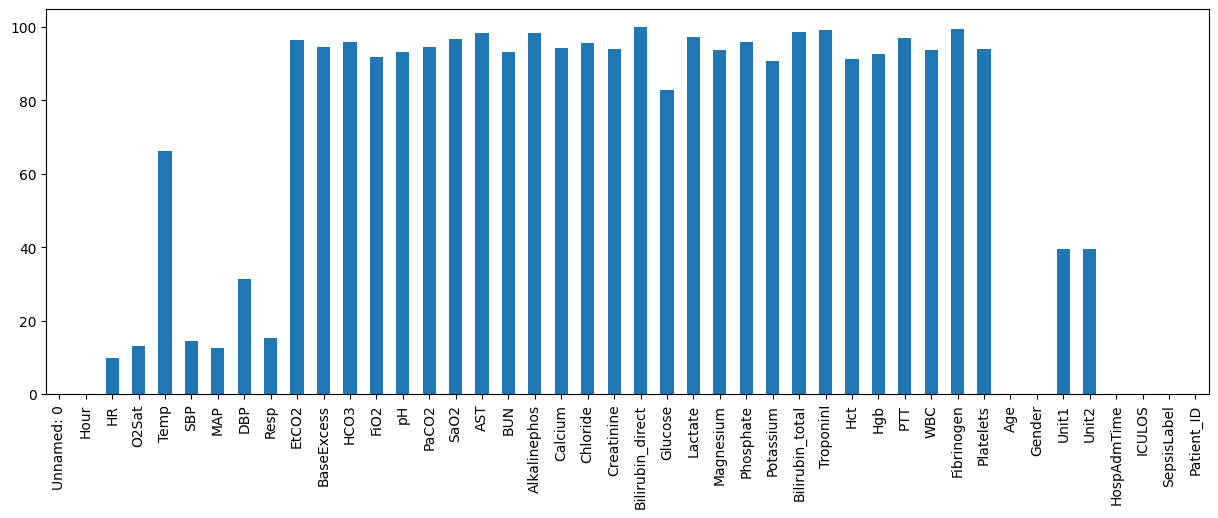

In [ ]:
### For all lab values , more than 80% of data are missing
print("\nMissing values per column:")
round(100*(medical_data.isnull().sum()/len(medical_data.index)),2).plot.bar(figsize=(15,5))

In [ ]:
medical_data.drop(['Unit1','Unit2','HospAdmTime','Unnamed: 0','BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets',], axis=1, inplace=True)

In [ ]:
medical_data.drop(['SepsisLabel'], axis=1, inplace=True)

In [ ]:
medical_data.drop(['EtCO2','DBP'], axis=1, inplace=True)

In [ ]:
medical_data.columns

Index(['Hour', 'HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'Resp', 'Age', 'Gender',
       'ICULOS', 'Patient_ID'],
      dtype='object')

In [ ]:
null_counts = medical_data.isnull().sum()
print(null_counts)

Hour                0
HR             153399
O2Sat          202736
Temp          1026984
SBP            226265
MAP            193270
Resp           238335
Age                 0
Gender              0
ICULOS              0
Patient_ID          0
dtype: int64


In [ ]:
medical_data['Hour'].value_counts()

,count
Hour,
0,40336
1,40336
2,40336
3,40336
4,40336
...,...
331,16
332,16
333,15


In [ ]:
data1=medical_data.copy()

In [ ]:
# Check for columns with all NaN values for each Patient_ID
all_nan_counts = data1.groupby('Patient_ID').apply(lambda group: group.isnull().all())
print(all_nan_counts)


             Hour     HR  O2Sat   Temp    SBP    MAP   Resp    Age  Gender  \
Patient_ID                                                                   
1           False  False  False  False  False  False  False  False   False   
2           False  False  False  False  False  False  False  False   False   
3           False  False  False  False  False  False  False  False   False   
4           False  False  False  False  False  False  False  False   False   
5           False  False  False  False  False  False  False  False   False   
...           ...    ...    ...    ...    ...    ...    ...    ...     ...   
119996      False  False  False  False  False  False  False  False   False   
119997      False  False  False  False  False  False  False  False   False   
119998      False  False  False  False  False  False  False  False   False   
119999      False  False  False  False  False  False  False  False   False   
120000      False  False  False  False  False  False  False  Fal

<ipython-input-15-ca10fe91942a>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  all_nan_counts = data1.groupby('Patient_ID').apply(lambda group: group.isnull().all())


In [ ]:
all_nan_counts['HR'].value_counts()

,count
HR,
False,40331
True,5


In [ ]:
all_nan_counts['O2Sat'].value_counts()

,count
O2Sat,
False,40318
True,18


In [ ]:
all_nan_counts['Temp'].value_counts()

,count
Temp,
False,40052
True,284


In [ ]:
all_nan_counts['SBP'].value_counts()

,count
SBP,
False,40054
True,282


In [ ]:
all_nan_counts['MAP'].value_counts()

,count
MAP,
False,40232
True,104


In [ ]:
all_nan_counts['Resp'].value_counts()

,count
Resp,
False,40265
True,71


In [ ]:
all_nan_counts['Hour'].value_counts()

,count
Hour,
False,40336


In [ ]:
# Identify Patient_IDs with all NaN values in any column
patients_to_drop = all_nan_counts[all_nan_counts.any(axis=1)].index
data_cleaned = data1[~data1['Patient_ID'].isin(patients_to_drop)]

print("Original data shape:", data1.shape)
print("Cleaned data shape:", data_cleaned.shape)

Original data shape: (1552210, 11)
Cleaned data shape: (1530157, 11)


In [ ]:
import pandas as pd
import numpy as np


def impute_vitals_with_patient_median(group):
    vital_columns = ['HR', 'O2Sat', 'Temp', 'Resp', 'SBP', 'MAP']
    group = group.sort_values(by='Hour')

    for col in vital_columns:
        group[col] = group[col].interpolate(method='linear', limit_direction='both')
        group[col] = group[col].fillna(method='ffill').fillna(method='bfill')
        if group[col].isnull().any():
            patient_median = group[col].median()
            group[col] = group[col].fillna(patient_median)

    return group

data1 = data_cleaned.groupby('Patient_ID').apply(impute_vitals_with_patient_median)
data1.reset_index(drop=True, inplace=True)



<ipython-input-24-0c3adec497e6>:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  group[col] = group[col].fillna(method='ffill').fillna(method='bfill')
<ipython-input-24-0c3adec497e6>:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data1 = data_cleaned.groupby('Patient_ID').apply(impute_vitals_with_patient_median)


In [ ]:
data1.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,ICULOS,Patient_ID
0,0,97.0,95.0,36.11,98.0,75.330,19.0,83.14,0,1,1
1,1,97.0,95.0,36.11,98.0,75.330,19.0,83.14,0,2,1
2,2,89.0,99.0,36.11,122.0,86.000,22.0,83.14,0,3,1
3,3,90.0,95.0,36.11,122.0,88.665,30.0,83.14,0,4,1
4,4,103.0,88.5,36.11,122.0,91.330,24.5,83.14,0,5,1


In [ ]:
data1.isnull().sum()

,0
Hour,0
HR,0
O2Sat,0
Temp,0
SBP,0
MAP,0
Resp,0
Age,0
Gender,0
ICULOS,0


In [ ]:
df_ready_for_generation=data1.copy()

In [ ]:
df_ready_for_generation.to_csv('df_ready_for_generation.csv', index=False)

In [ ]:
df_ready_for_generation.head()

,Hour,HR,O2Sat,Temp,SBP,MAP,Resp,Age,Gender,ICULOS,Patient_ID
0,0,97.0,95.0,36.11,98.0,75.330,19.0,83.14,0,1,1
1,1,97.0,95.0,36.11,98.0,75.330,19.0,83.14,0,2,1
2,2,89.0,99.0,36.11,122.0,86.000,22.0,83.14,0,3,1
3,3,90.0,95.0,36.11,122.0,88.665,30.0,83.14,0,4,1
4,4,103.0,88.5,36.11,122.0,91.330,24.5,83.14,0,5,1
